In [81]:
import numpy as np
import pandas as pd

## Comparing results of inter-annotater method

In [82]:
df_annotated = pd.read_excel('Annotated_Emotion_Data.xlsx')
df_annotated

,Image URL,Angry,Sad,Happy,Fear,Surprise,Disgust,Neutral,Label (Alvaro),Label(Agniv),Comparison
0,https://lh4.ggpht.com/RcottnlLRe9AZBQe8H1U-_2s...,0,0,0,0.0,0,0,1.0,Neutral,Neutral,1.0
1,https://lh6.ggpht.com/pqGMDTGItXibp-MP-6zal2LL...,0,0,0,0.0,0,0,1.0,Neutral,Neutral,1.0
2,https://lh3.ggpht.com/105f-f-8mvCLDIqCDPVB1UAF...,0,0,0,0.0,0,0,1.0,Neutral,Neutral,1.0
3,https://lh5.ggpht.com/uQ-NmKX5ucGkYMpJM8EWZQw8...,0,0,0,0.0,0,0,1.0,Neutral,Neutral,1.0
4,https://lh5.ggpht.com/PM-l8Vz4-aDMDVTJzBPFgGBR...,1,0,0,0.0,0,0,0.0,Angry,Angry,1.0
...,...,...,...,...,...,...,...,...,...,...,...
763,https://lh3.googleusercontent.com/kMZ_ZOsQyFwT...,0,0,0,0.0,0,0,1.0,Neutral,Neutral,1.0
764,https://lh3.googleusercontent.com/hpl3FiKJyceP...,0,0,1,0.0,0,0,0.0,Happy,Happy,1.0
765,https://lh3.googleusercontent.com/8IJF23RpZ5Jj...,0,0,1,0.0,0,0,0.0,Happy,Happy,1.0
766,Total,766,766,58,31.0,31,31,468.0,NaN,NaN,NaN


In [83]:
df_labels = df_annotated[['Label (Alvaro)', 'Label(Agniv)']].iloc[:-2]
df_labels

,Label (Alvaro),Label(Agniv)
0,Neutral,Neutral
1,Neutral,Neutral
2,Neutral,Neutral
3,Neutral,Neutral
4,Angry,Angry
...,...,...
761,Sad,Sad
762,Neutral,Neutral
763,Neutral,Neutral
764,Happy,Happy


In [84]:
from sklearn.metrics import cohen_kappa_score

In [85]:
cohen_kappa = cohen_kappa_score(
    np.array(df_labels['Label (Alvaro)']), 
    np.array(df_labels['Label(Agniv)'])
)

print("Cohen's Kappa: ", cohen_kappa)

Cohen's Kappa:  0.8654228700644379


In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

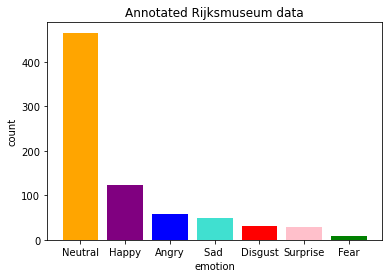

In [101]:
counts = df_labels['Label (Alvaro)'].value_counts()
names = counts.index
occurrences = counts.values

plt.bar(names, occurrences, color=['orange', 'purple', 'blue', 'turquoise', 'red', 'pink', 'green'])
plt.xlabel('emotion')
plt.ylabel('count')
plt.title('Annotated Rijksmuseum data')
plt.show()

## Comparing model-outputted and human-annotated labels for Rijksmuseum

In [104]:
df_human = df_labels[['Label (Alvaro)']]
df_human

,Label (Alvaro)
0,Neutral
1,Neutral
2,Neutral
3,Neutral
4,Angry
...,...
761,Sad
762,Neutral
763,Neutral
764,Happy


In [105]:
def categorize(row):
    if row['Label (Alvaro)'] == 'Angry':
        return 1
    elif row['Label (Alvaro)'] == 'Sad ':
        return 2
    elif row['Label (Alvaro)'] == 'Happy':
        return 3
    elif row['Label (Alvaro)'] == 'Fear':
        return 4
    elif row['Label (Alvaro)'] == 'Surprise':
        return 5
    elif row['Label (Alvaro)'] == 'Disgust':
        return 6
    else:
        return 7

In [106]:
df_human['label'] = df_human.apply(lambda x: categorize(x), axis=1)
df_human

,Label (Alvaro),label
0,Neutral,7
1,Neutral,7
2,Neutral,7
3,Neutral,7
4,Angry,1
...,...,...
761,Sad,2
762,Neutral,7
763,Neutral,7
764,Happy,3


In [107]:
filename = []

for i in range(1, len(df_human) + 1):
    name = "img_%d.jpg" % i
    filename.append(name)
    
print(len(filename))

766


In [108]:
df_human.insert(0, 'filename', filename, True)
df_human

,filename,Label (Alvaro),label
0,img_1.jpg,Neutral,7
1,img_2.jpg,Neutral,7
2,img_3.jpg,Neutral,7
3,img_4.jpg,Neutral,7
4,img_5.jpg,Angry,1
...,...,...,...
761,img_762.jpg,Sad,2
762,img_763.jpg,Neutral,7
763,img_764.jpg,Neutral,7
764,img_765.jpg,Happy,3


### VGG-19

In [109]:
df_vgg = pd.read_csv('predictions/vgg19_predictions_15epochs')
df_vgg = df_vgg[['filename', 'predicted_label']]
df_vgg

,filename,predicted_label
0,img_1.jpg,3
1,img_10.jpg,4
2,img_100.jpg,2
3,img_101.jpg,3
4,img_102.jpg,6
...,...,...
761,img_95.jpg,4
762,img_96.jpg,3
763,img_97.jpg,3
764,img_98.jpg,3


In [110]:
df_merged = pd.merge(df_human, df_vgg, on='filename')
df_merged

,filename,Label (Alvaro),label,predicted_label
0,img_1.jpg,Neutral,7,3
1,img_2.jpg,Neutral,7,2
2,img_3.jpg,Neutral,7,6
3,img_4.jpg,Neutral,7,4
4,img_5.jpg,Angry,1,6
...,...,...,...,...
761,img_762.jpg,Sad,2,3
762,img_763.jpg,Neutral,7,1
763,img_764.jpg,Neutral,7,4
764,img_765.jpg,Happy,3,3


In [111]:
correct = (df_merged['label'] == df_merged['predicted_label'])
accuracy = (correct.sum() / correct.size) * 100
accuracy

14.490861618798956

Int64Index([3, 2, 6, 4, 7, 1], dtype='int64')


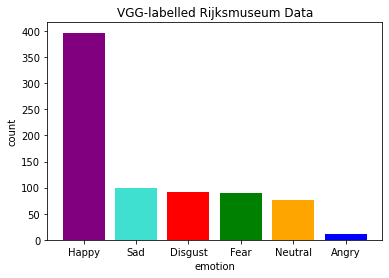

In [119]:
counts = df_vgg['predicted_label'].value_counts()
print(counts.index)
names = ['Happy', 'Sad', 'Disgust', 'Fear', 'Neutral', 'Angry']
occurrences = counts.values

plt.bar(names, occurrences, color=['purple', 'turquoise', 'red', 'green', 'orange', 'blue'])
plt.xlabel('emotion')
plt.ylabel('count')
plt.title('VGG-labelled Rijksmuseum Data')
plt.show()

### VGG-19 (Post-SMOTE)

In [114]:
df_vgg_resampled = pd.read_csv('predictions/vgg19_predictions_resampled')
df_vgg_resampled = df_vgg_resampled[['filename', 'predicted_label']]
df_vgg_resampled

,filename,predicted_label
0,img_1.jpg,3
1,img_10.jpg,4
2,img_100.jpg,3
3,img_101.jpg,3
4,img_102.jpg,3
...,...,...
761,img_95.jpg,4
762,img_96.jpg,3
763,img_97.jpg,3
764,img_98.jpg,3


In [115]:
df_merged = pd.merge(df_human, df_vgg_resampled, on='filename')
df_merged

,filename,Label (Alvaro),label,predicted_label
0,img_1.jpg,Neutral,7,3
1,img_2.jpg,Neutral,7,4
2,img_3.jpg,Neutral,7,6
3,img_4.jpg,Neutral,7,4
4,img_5.jpg,Angry,1,3
...,...,...,...,...
761,img_762.jpg,Sad,2,3
762,img_763.jpg,Neutral,7,1
763,img_764.jpg,Neutral,7,4
764,img_765.jpg,Happy,3,6


In [116]:
correct = (df_merged['label'] == df_merged['predicted_label'])
accuracy = (correct.sum() / correct.size) * 100
accuracy

10.704960835509137

Int64Index([3, 4, 6, 2, 7, 1], dtype='int64')


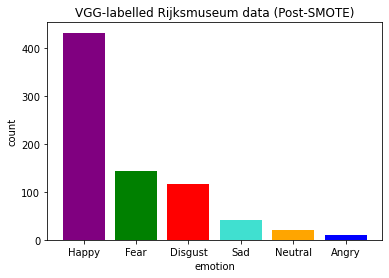

In [120]:
counts = df_vgg_resampled['predicted_label'].value_counts()
print(counts.index)
names = ['Happy', 'Fear', 'Disgust', 'Sad', 'Neutral', 'Angry']
occurrences = counts.values

plt.bar(names, occurrences, color=['purple', 'green', 'red', 'turquoise', 'orange', 'blue'])
plt.xlabel('emotion')
plt.ylabel('count')
plt.title('VGG-labelled Rijksmuseum data (Post-SMOTE)')
plt.show()

### AlexNet

In [121]:
df_alexnet = pd.read_csv('predictions/alexnet_predictions_15epochs')
df_alexnet = df_alexnet[['filename', 'predicted_label']]
df_alexnet

,filename,predicted_label
0,img_1.jpg,4
1,img_10.jpg,4
2,img_100.jpg,4
3,img_101.jpg,3
4,img_102.jpg,7
...,...,...
761,img_95.jpg,4
762,img_96.jpg,3
763,img_97.jpg,3
764,img_98.jpg,3


In [122]:
df_merged = pd.merge(df_human, df_alexnet, on='filename')
df_merged

,filename,Label (Alvaro),label,predicted_label
0,img_1.jpg,Neutral,7,4
1,img_2.jpg,Neutral,7,2
2,img_3.jpg,Neutral,7,4
3,img_4.jpg,Neutral,7,4
4,img_5.jpg,Angry,1,3
...,...,...,...,...
761,img_762.jpg,Sad,2,1
762,img_763.jpg,Neutral,7,3
763,img_764.jpg,Neutral,7,4
764,img_765.jpg,Happy,3,3


In [123]:
correct = (df_merged['label'] == df_merged['predicted_label'])
accuracy = (correct.sum() / correct.size) * 100
accuracy

15.404699738903393

Int64Index([3, 4, 2, 7, 1, 6], dtype='int64')


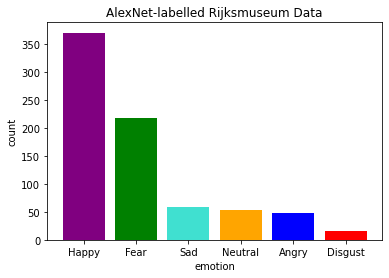

In [125]:
counts = df_alexnet['predicted_label'].value_counts()
print(counts.index)
names = ['Happy', 'Fear', 'Sad', 'Neutral', 'Angry', 'Disgust']
occurrences = counts.values

plt.bar(names, occurrences, color=['purple', 'green', 'turquoise', 'orange', 'blue', 'red'])
plt.xlabel('emotion')
plt.ylabel('count')
plt.title('AlexNet-labelled Rijksmuseum Data')
plt.show()

### AlexNet (Post-SMOTE)

In [126]:
df_alexnet_resampled = pd.read_csv('predictions/alexnet_predictions_resampled')
df_alexnet_resampled = df_alexnet_resampled[['filename', 'predicted_label']]
df_alexnet_resampled

,filename,predicted_label
0,img_1.jpg,4
1,img_10.jpg,4
2,img_100.jpg,7
3,img_101.jpg,3
4,img_102.jpg,7
...,...,...
761,img_95.jpg,4
762,img_96.jpg,3
763,img_97.jpg,1
764,img_98.jpg,3


In [127]:
df_merged = pd.merge(df_human, df_alexnet_resampled, on='filename')
df_merged

,filename,Label (Alvaro),label,predicted_label
0,img_1.jpg,Neutral,7,4
1,img_2.jpg,Neutral,7,2
2,img_3.jpg,Neutral,7,3
3,img_4.jpg,Neutral,7,7
4,img_5.jpg,Angry,1,3
...,...,...,...,...
761,img_762.jpg,Sad,2,7
762,img_763.jpg,Neutral,7,3
763,img_764.jpg,Neutral,7,4
764,img_765.jpg,Happy,3,3


In [128]:
correct = (df_merged['label'] == df_merged['predicted_label'])
accuracy = (correct.sum() / correct.size) * 100
accuracy

18.407310704960835

Int64Index([3, 4, 7, 6, 2, 1], dtype='int64')


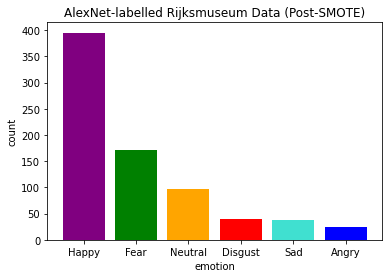

In [130]:
counts = df_alexnet_resampled['predicted_label'].value_counts()
print(counts.index)
names = ['Happy', 'Fear', 'Neutral', 'Disgust', 'Sad', 'Angry']
occurrences = counts.values

plt.bar(names, occurrences, color=['purple', 'green', 'orange', 'red', 'turquoise', 'blue'])
plt.xlabel('emotion')
plt.ylabel('count')
plt.title('AlexNet-labelled Rijksmuseum Data (Post-SMOTE)')
plt.show()

### ResNet-50

In [131]:
df_resnet = pd.read_csv('predictions/resnet50_predictions_15epochs')
df_resnet = df_resnet[['filename', 'predicted_label']]
df_resnet

,filename,predicted_label
0,img_1.jpg,4
1,img_10.jpg,4
2,img_100.jpg,6
3,img_101.jpg,4
4,img_102.jpg,6
...,...,...
761,img_95.jpg,4
762,img_96.jpg,7
763,img_97.jpg,3
764,img_98.jpg,6


In [132]:
df_merged = pd.merge(df_human, df_resnet, on='filename')
df_merged

,filename,Label (Alvaro),label,predicted_label
0,img_1.jpg,Neutral,7,4
1,img_2.jpg,Neutral,7,6
2,img_3.jpg,Neutral,7,6
3,img_4.jpg,Neutral,7,4
4,img_5.jpg,Angry,1,4
...,...,...,...,...
761,img_762.jpg,Sad,2,1
762,img_763.jpg,Neutral,7,7
763,img_764.jpg,Neutral,7,4
764,img_765.jpg,Happy,3,6


In [133]:
correct = (df_merged['label'] == df_merged['predicted_label'])
accuracy = (correct.sum() / correct.size) * 100
accuracy

8.355091383812011

Int64Index([4, 6, 3, 2, 1, 7], dtype='int64')


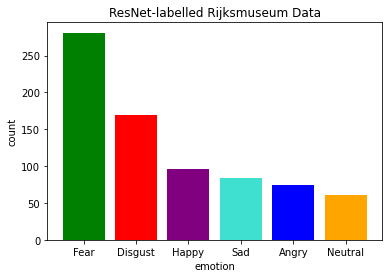

In [135]:
counts = df_resnet['predicted_label'].value_counts()
print(counts.index)
names = ['Fear', 'Disgust', 'Happy', 'Sad', 'Angry', 'Neutral']
occurrences = counts.values

plt.bar(names, occurrences, color=['green', 'red', 'purple', 'turquoise', 'blue', 'orange'])
plt.xlabel('emotion')
plt.ylabel('count')
plt.title('ResNet-labelled Rijksmuseum Data')
plt.show()

### Resnet50 (Post-SMOTE)

In [136]:
df_resnet_resampled = pd.read_csv('predictions/resnet50_predictions_resampled')
df_resnet_resampled = df_resnet_resampled[['filename', 'predicted_label']]
df_resnet_resampled

,filename,predicted_label
0,img_1.jpg,4
1,img_10.jpg,4
2,img_100.jpg,4
3,img_101.jpg,6
4,img_102.jpg,4
...,...,...
761,img_95.jpg,4
762,img_96.jpg,4
763,img_97.jpg,1
764,img_98.jpg,6


In [137]:
df_merged = pd.merge(df_human, df_resnet_resampled, on='filename')
df_merged

,filename,Label (Alvaro),label,predicted_label
0,img_1.jpg,Neutral,7,4
1,img_2.jpg,Neutral,7,4
2,img_3.jpg,Neutral,7,4
3,img_4.jpg,Neutral,7,4
4,img_5.jpg,Angry,1,6
...,...,...,...,...
761,img_762.jpg,Sad,2,1
762,img_763.jpg,Neutral,7,4
763,img_764.jpg,Neutral,7,4
764,img_765.jpg,Happy,3,6


In [138]:
correct = (df_merged['label'] == df_merged['predicted_label'])
accuracy = (correct.sum() / correct.size) * 100
accuracy

4.43864229765013

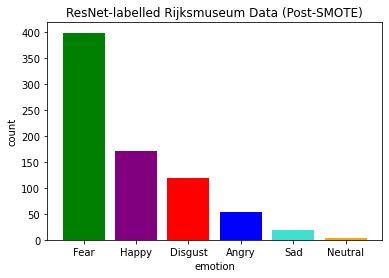

In [140]:
counts = df_resnet_resampled['predicted_label'].value_counts()
names = ['Fear', 'Happy', 'Disgust', 'Angry', 'Sad', 'Neutral']
occurrences = counts.values

plt.bar(names, occurrences, color=['green', 'purple', 'red', 'blue', 'turquoise', 'orange'])
plt.xlabel('emotion')
plt.ylabel('count')
plt.title('ResNet-labelled Rijksmuseum Data (Post-SMOTE)')
plt.show()

### GoogleNet

In [141]:
df_googlenet = pd.read_csv('predictions/googlenet_predictions_15epochs')
df_googlenet = df_googlenet[['filename', 'predicted_label']]
df_googlenet

,filename,predicted_label
0,img_1.jpg,6
1,img_10.jpg,6
2,img_100.jpg,6
3,img_101.jpg,4
4,img_102.jpg,2
...,...,...
761,img_95.jpg,2
762,img_96.jpg,6
763,img_97.jpg,4
764,img_98.jpg,6


In [142]:
df_merged = pd.merge(df_human, df_googlenet, on='filename')
df_merged

,filename,Label (Alvaro),label,predicted_label
0,img_1.jpg,Neutral,7,6
1,img_2.jpg,Neutral,7,2
2,img_3.jpg,Neutral,7,4
3,img_4.jpg,Neutral,7,6
4,img_5.jpg,Angry,1,2
...,...,...,...,...
761,img_762.jpg,Sad,2,4
762,img_763.jpg,Neutral,7,4
763,img_764.jpg,Neutral,7,4
764,img_765.jpg,Happy,3,6


In [143]:
correct = (df_merged['label'] == df_merged['predicted_label'])
accuracy = (correct.sum() / correct.size) * 100
accuracy

5.221932114882506

Int64Index([6, 4, 2, 7, 3, 1], dtype='int64')


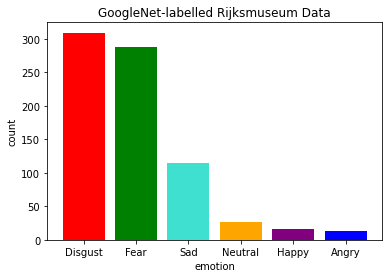

In [145]:
counts = df_googlenet['predicted_label'].value_counts()
print(counts.index)
names = ['Disgust', 'Fear', 'Sad', 'Neutral', 'Happy', 'Angry']
occurrences = counts.values

plt.bar(names, occurrences, color=['red', 'green', 'turquoise', 'orange', 'purple', 'blue'])
plt.xlabel('emotion')
plt.ylabel('count')
plt.title('GoogleNet-labelled Rijksmuseum Data')
plt.show()